### Porting to Google Colab
The following cell enables this notebook to run from Google Colab as well as from your local machine IDE.<br>
You can change `root_directory` and/or `this_notebook_google_path` to point to the directory in your Google account, which contains this notebook, together with the `imgs` sub-directory and the rest of the files.<br>

In [9]:
import sys
import os
try:
    from google.colab import drive as google_drive # type: ignore
except:
    # no Google Colab --> fall back to local machine
    google_drive = None

if google_drive is not None:
    google_drive_directory = os.path.join('/','content','gdrive')
    google_drive.mount(google_drive_directory)
    all_projects_path = os.path.join(google_drive_directory, 'Othercomputers','My Laptop', 'projects')
else:
    all_projects_path = os.path.join('d:\\', 'projects')

project_path = os.path.join(all_projects_path,'RUNI','Thesis')
assert os.path.exists(project_path), f'Project path {project_path} not found!'
# enable import python files from this notebook's path
sys.path.append(project_path)
# enable reading images and data files from this notebook's path
os.chdir(project_path)

datasets_path = os.path.join(project_path, 'datasets')
assert os.path.exists(datasets_path), f'Datasets path {datasets_path} not found!'

output_path = os.path.join(project_path, 'output')
os.makedirs(output_path, exist_ok=True)
assert os.path.exists(output_path), f'Output path {output_path} not found!'

print(f'Current working directory: {os.getcwd()}')
print(f'Datasets path: {datasets_path}')
print(f'Output path: {output_path}')

Current working directory: d:\projects\RUNI\Thesis
Datasets path: d:\projects\RUNI\Thesis\datasets
Output path: d:\projects\RUNI\Thesis\output


In [10]:
from python.hpc import HybridArray

In [11]:
import numpy as np
from python.metrics.metrics import analyze_auc_r_beta_ranges
from python.analysis import visualization

In [12]:
N = 10000
num_monte = 10000
num_r = 21
num_beta = 21
r_range = np.linspace(0.0, 1.0, num_r)
beta_range = np.linspace(0.5,1.0,num_beta)
alpha = 0.1
print(f'{r_range=}')
print(f'{beta_range=}')

r_range=array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])
beta_range=array([0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 , 0.675, 0.7  ,
       0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875, 0.9  , 0.925,
       0.95 , 0.975, 1.   ])


In [13]:

def simulation(r_range: np.ndarray|list, beta_range: np.ndarray|list,\
               N:int, num_monte: int, alpha_selection_method:float|str,\
                **kwargs) -> None:
    print(f'Running on {kwargs}')
    auc =analyze_auc_r_beta_ranges(\
            r_range=r_range, beta_range=beta_range,\
            N=N, num_monte=num_monte,\
            alpha_selection_method=alpha_selection_method,\
            use_gpu=True, **kwargs)
    visualization.heatmap_r_beta_range(\
            r_range=r_range,\
            beta_range=beta_range,\
            data=auc,\
            value_name='AUC', data_min=0.5, data_max=None,\
            title=f'{N=} {num_monte=} {alpha_selection_method=}')



Running on {'transform_method': 'higher_criticism_stable', 'discovery_method': 'argmin'}


Processing:   0%|          | 0/442 [00:00<?, ?step/s, Current Step=0]d:\venv\thesis\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 10 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
Processing: 100%|██████████| 442/442 [08:17<00:00,  1.13s/step, Current Step=441]


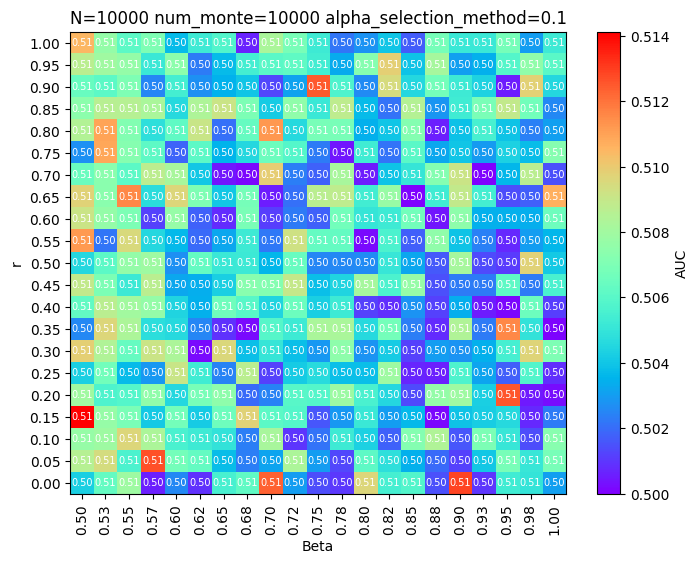

In [14]:
simulation(N=N, num_monte=num_monte,\
            r_range=r_range, beta_range=beta_range,\
            alpha_selection_method = alpha,\
            transform_method='higher_criticism_stable',\
            discovery_method='argmin')

In [ ]:
simulation(N=N, num_monte=num_monte,\
            r_range=r_range, beta_range=beta_range,\
            alpha_selection_method = alpha,\
                transform_method='higher_criticism_unstable',\
            discovery_method='argmin')

Running on {'transform_method': 'higher_criticism_unstable', 'discovery_method': 'argmin'}


Processing:   3%|▎         | 12/442 [00:13<08:02,  1.12s/step, Current Step=12]

In [ ]:
simulation(N=N, num_monte=num_monte,\
            r_range=r_range, beta_range=beta_range,\
            alpha_selection_method = alpha,\
                transform_method='berk_jones',\
            discovery_method='argmin')

Running on {'transform_method': 'berk_jones', 'discovery_method': 'argmin'}


Processing:   2%|▏         | 9/442 [00:27<22:00,  3.05s/step, Current Step=9]


KeyboardInterrupt: 